In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time


EJERCICIO 3

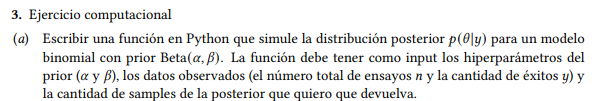

In [20]:
def posterior(alpha, beta_p, ensayos, exitos, samples):
    return stats.beta.rvs(exitos + alpha, ensayos - exitos + beta_p, samples)

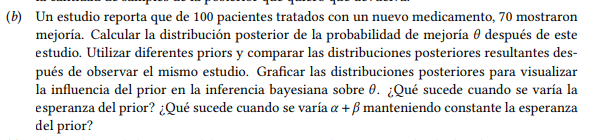

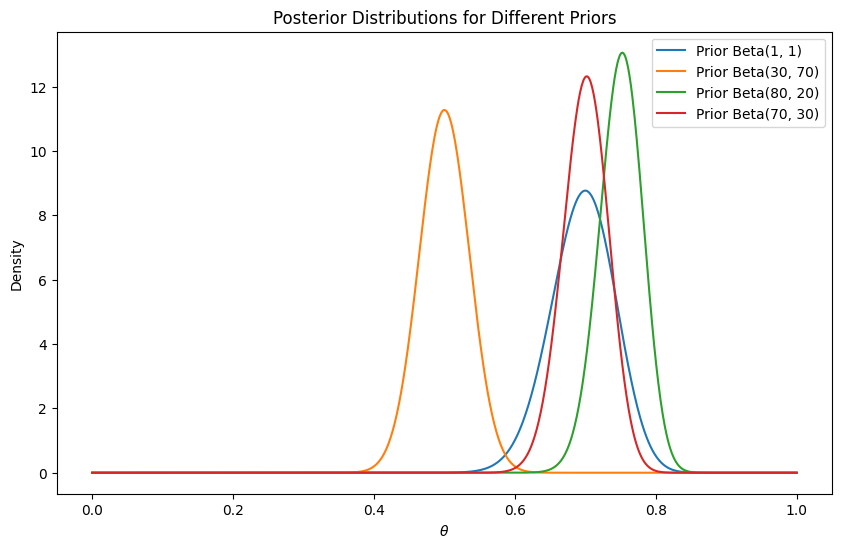

In [21]:
n = 100
y = 70
samples = 10000

priors = [(1, 1), (30, 70), (80, 20), (70, 30)]

x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for alpha, beta in priors:
    posterior_samples = posterior(alpha, beta, n, y, samples)
    ax.plot(x, stats.beta.pdf(x, alpha + y, beta + n - y), label=f'Prior Beta({alpha}, {beta})')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Density')
ax.legend()
plt.title('Posterior Distributions for Different Priors')
plt.show()

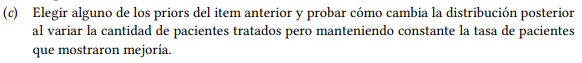

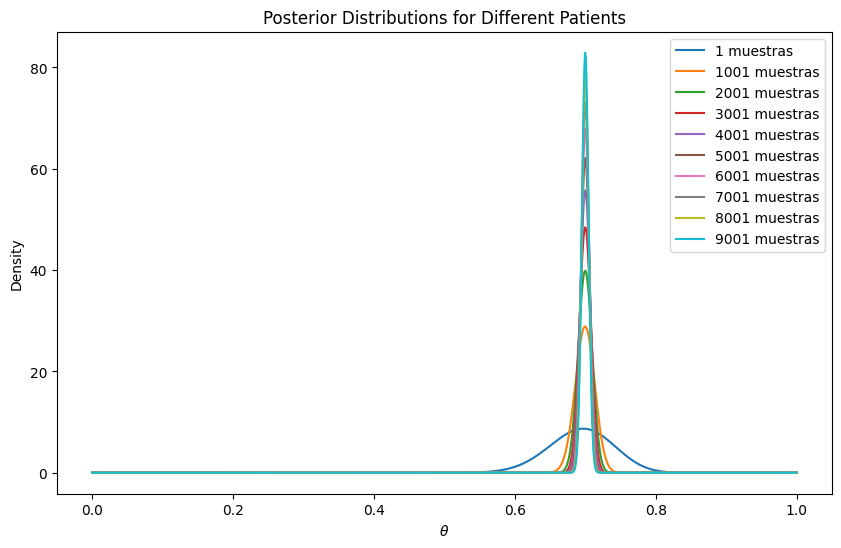

In [28]:
samples = 1000
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for n in range(1, 10000, 1000):
    y = int(n * 0.7)
    posterior_samples = posterior(70, 30, n, y, samples)
    ax.plot(x, stats.beta.pdf(x, 70 + y, 30 + n - y), label=f'{n} muestras')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Density')
ax.legend()
plt.title('Posterior Distributions for Different Patients')
plt.show()

EJERCICIO 4

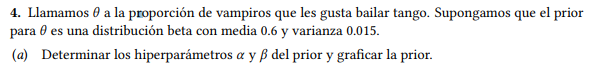

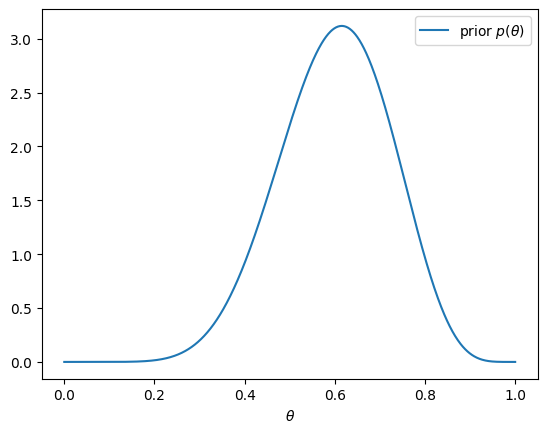

In [30]:
a,b = 9,6

x = np.linspace(0,1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.beta.pdf(x, a, b), label=r'prior $p(\theta)$')
ax.set_xlabel(r'$\theta$')
plt.legend()

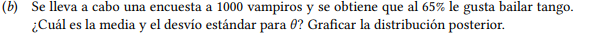

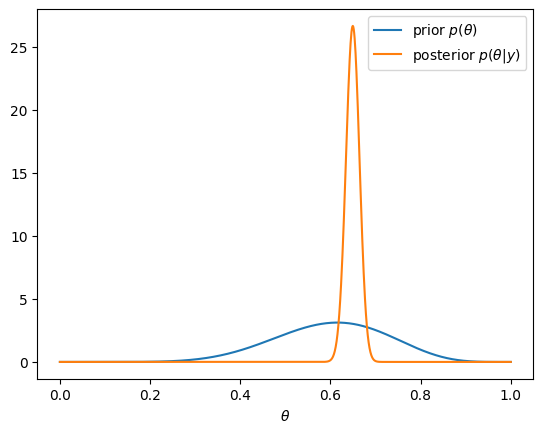

In [32]:
a=9
b=6
y=650
n=1000

x = np.linspace(0,1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.beta.pdf(x, a, b), label=r'prior $p(\theta)$')
ax.plot(x, stats.beta.pdf(x, a+y, b+n-y), label=r'posterior $p(\theta|y)$')
ax.set_xlabel(r'$\theta$')
plt.legend()

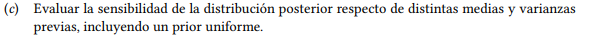

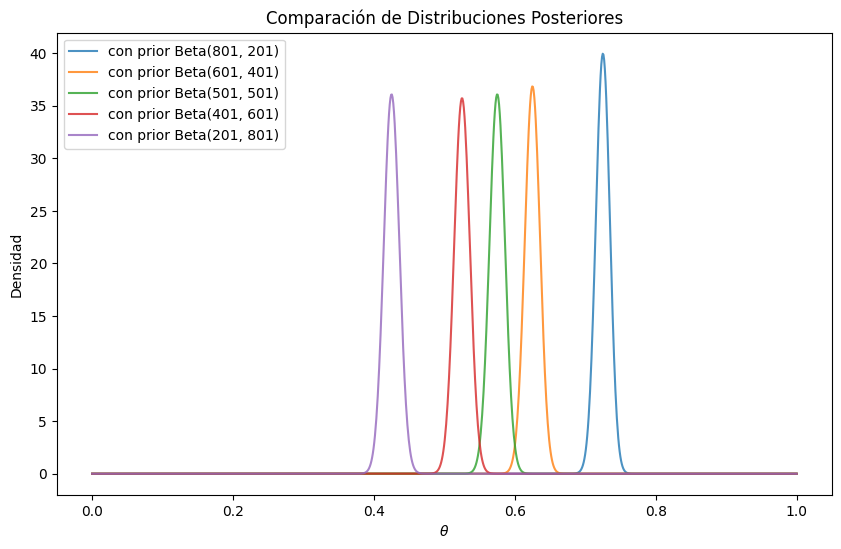

In [37]:
def plot_priors_comparison(priors, y, n):
    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(10, 6))

    for prior in priors:
        a, b = prior
        posterior = stats.beta(a+y, b+n-y)
        plt.plot(x, posterior.pdf(x), label=f'con prior Beta({a}, {b})',alpha=0.8)

    plt.xlabel(r'$\theta$')
    plt.ylabel('Densidad')
    plt.title('Comparación de Distribuciones Posteriores')
    plt.legend()
    plt.show()

# priors = [(1,1),(9,6)] #no cambia nada porque son ambos muy pequeños y se lleva todo la likelihood por n=1000
# priors = [(1,1),(3,2),(9,6),(90,60),(900,600),(9000,6000)] #distintas varianzas, misma media
# priors = [(801,201),(601,401),(501,501),(401,601),(201,801)] #distintas medias, misma varianza

plot_priors_comparison(priors, y, n)

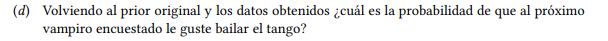

In [39]:
alpha_post = a + y
beta_post = b + n - y

mean_post = alpha_post / (alpha_post + beta_post)

print(mean_post)

0.6492610837438424


EJERCICIO 5

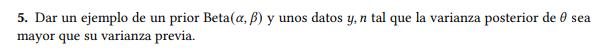

In [46]:
import numpy as np
from scipy.stats import beta

# Ejemplo de prior Beta(α, β)
alpha_prior = 2
beta_prior = 0.5

# Datos observados
n = 1
y = 0

# Parámetros de la distribución posterior
alpha_post = alpha_prior + y
beta_post = beta_prior + n - y

# Calcular la varianza de la distribución previa
var_prior = (alpha_prior * beta_prior) / ((alpha_prior + beta_prior)**2 * (alpha_prior + beta_prior + 1))

# Calcular la varianza de la distribución posterior
var_post = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))

print(f"Varianza previa: {var_prior}")
print(f"Varianza posterior: {var_post}")

# Verificar si la varianza posterior es mayor que la varianza previa
if var_post > var_prior:
    print("La varianza posterior es mayor que la varianza previa.")
else:
    print("La varianza posterior no es mayor que la varianza previa.")


Varianza previa: 0.045714285714285714
Varianza posterior: 0.05442176870748299
La varianza posterior es mayor que la varianza previa.
